## Import Libraries

In [1]:
%matplotlib inline

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

import keras
from keras.models import load_model

from helper import preprocess, get_sign_name

np.random.seed(42)

Using TensorFlow backend.


In [2]:
testing_file = 'data/test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

# Randomly select 10 traffic sign images
random_indexes = np.random.randint(0, X_test.shape[0], 10)
test_images = X_test[random_indexes]
true_label = y_test[random_indexes]

## Predict traffic sign labels

In [3]:

model = load_model('trained_model.h5')

# Preprocess images
processed_test_images = preprocess(test_images)

# Predict labels
predicted_label = model.predict_classes(processed_test_images)

10/10 [==============================] - 0s


## Display output

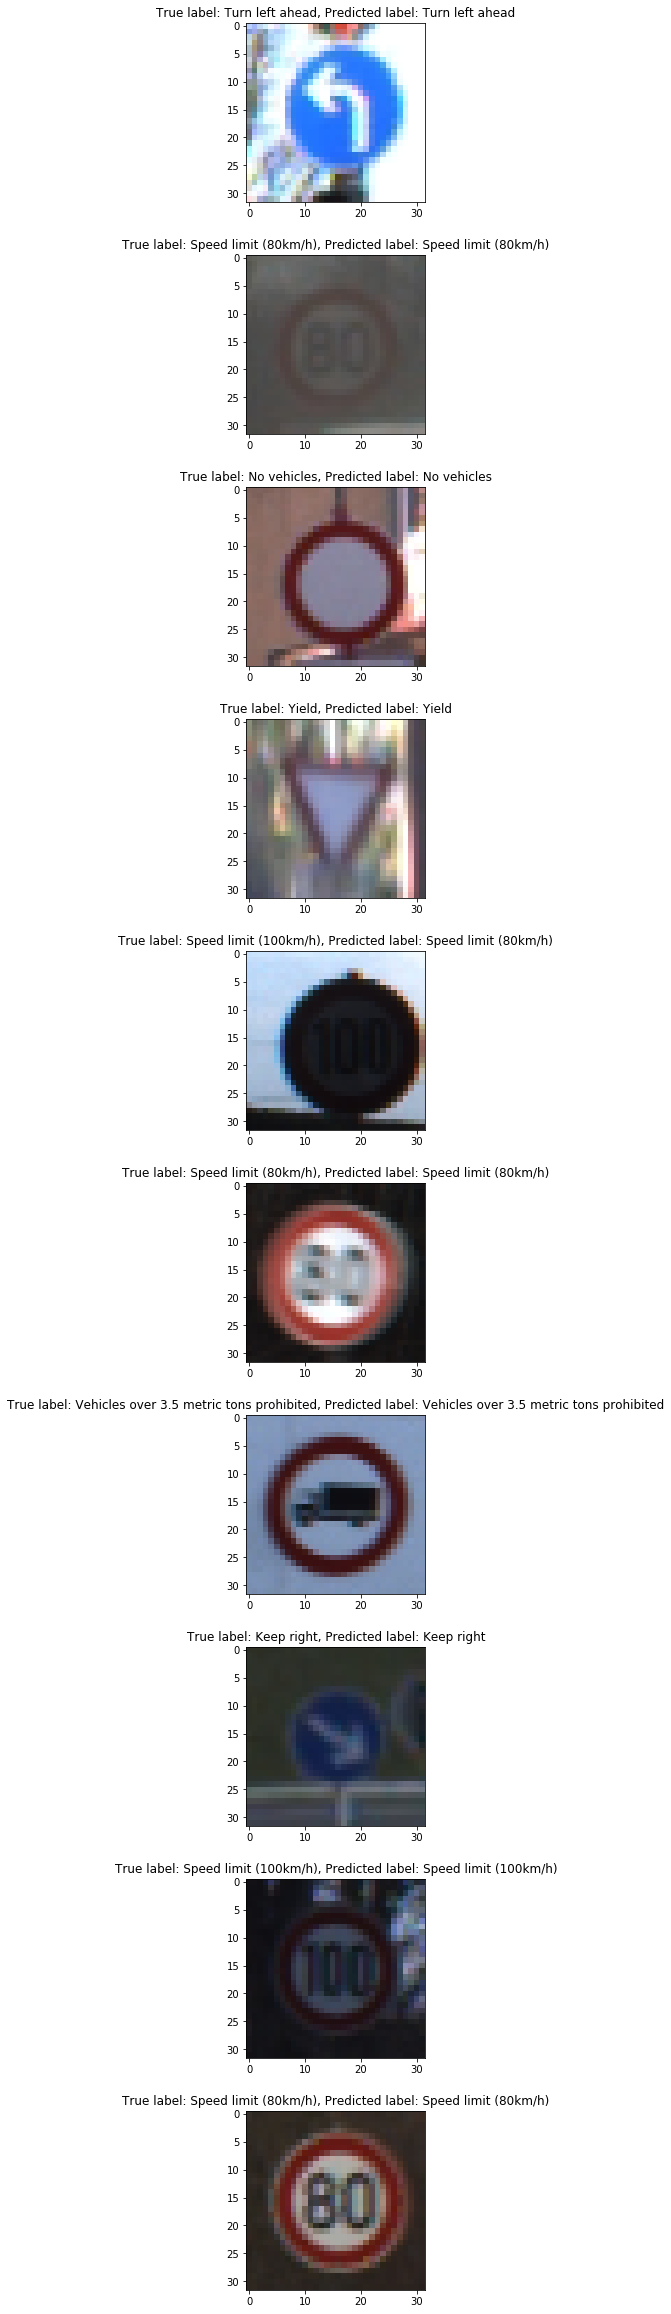

In [4]:
plt.figure(figsize=(32,32))
for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.imshow(test_images[i])
    #display(test_images[i,:,:,:])
    plt.title("True label: %s, Predicted label: %s" \
              %(get_sign_name(true_label[i]), get_sign_name(predicted_label[i])))
plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=2.0)